In [4995]:
import warnings
warnings.filterwarnings("ignore")

## Importing the libraries

In [4996]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import  mean_squared_error,r2_score

In [4997]:
df = pd.read_csv(r"C:\Users\Debanjan Kar\Desktop\Upgrad_excels\LR Assignmnt\CarPrice_Assignment.csv",na_values='NAN')

## Finding the percentage of missing values in each column

In [4998]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## There is no missing data in the table as we can see that from above.

## Checking the data types 

In [4999]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [5000]:
df.shape

(205, 26)

In [5001]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5002]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Visualizing the data

### Making pairplot of numerical variables

In [5003]:
#sns.pairplot(df)
#plt.show()

## for numerical variables

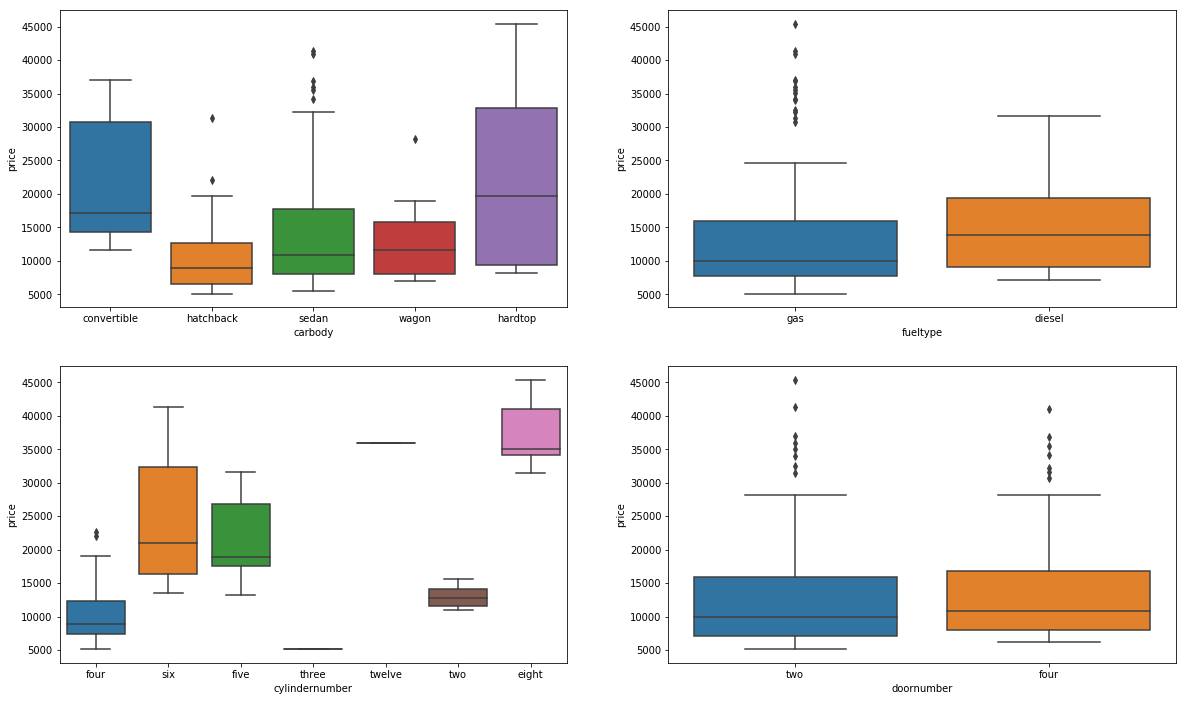

In [5004]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(2,2,4)
sns.boxplot(x = 'doornumber', y = 'price', data = df)

## Splitting the CarName column into two columns.

In [5005]:
#df[['CarName','car_name']] = df['CarName'].str.split("",expand = True)

In [5006]:
df['Company_name'] = df.CarName.str.split(' ', expand = True)[0]
df['Model_Name'] = df.CarName.str.split(' ', expand = True)[1]

In [5007]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_name,Model_Name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000,audi,100
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000,audi,100ls
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000,audi,fox
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000,audi,100ls
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000,audi,5000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000,audi,4000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167,audi,5000s


In [5008]:
df.groupby(['Company_name'])['Company_name'].count()

Company_name
Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: Company_name, dtype: int64

## The spelling of different car brands are wrong. Correcting the spellings.

In [5009]:
df["Company_name"].replace({"vokswagen": "volkswagen","maxda":"mazda","porcshce":"porsche","toyouta":"toyota"}, inplace=True)

In [5010]:
df.groupby(['Company_name'])['Company_name'].count()

Company_name
Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     10
volvo          11
vw              2
Name: Company_name, dtype: int64

## Correcting the column cylindernumber

In [5011]:
df['cylindernumber'] = df['cylindernumber'].map({'eight': 8,'five':5,'four':4,'six':6,'three':3,'twelve':12,'two': 2})

## Converting fueltype into 1s and 0s

In [5012]:
varlist= ['fueltype']#,'aspiration','doornumber','enginelocation']
def binary_map(x):
    return x.map({'gas': 1, "diesel": 0})
df[varlist] = df[varlist].apply(binary_map)

In [5013]:
#df['fueltype'].isna()

## Converting aspiration into 1s and 0s

In [5014]:
varlist=['aspiration']
def binary_map(x):
    return x.map({'std': 1, "turbo": 0})
df[varlist] = df[varlist].apply(binary_map)

## Converting doornumber

In [5015]:
varlist=['doornumber']
def binary_map(x):
    return x.map({'four': 4, "two": 2})
df[varlist] = df[varlist].apply(binary_map)

In [5016]:
df['doornumber']

0      2
1      2
2      2
3      4
4      4
5      2
6      4
7      4
8      4
9      2
10     2
11     4
12     2
13     4
14     4
15     4
16     2
17     4
18     2
19     2
20     4
21     2
22     2
23     2
24     4
25     4
26     4
27     2
28     4
29     2
      ..
175    4
176    4
177    4
178    2
179    2
180    4
181    4
182    2
183    2
184    4
185    4
186    4
187    4
188    4
189    2
190    2
191    4
192    4
193    4
194    4
195    4
196    4
197    4
198    4
199    4
200    4
201    4
202    4
203    4
204    4
Name: doornumber, Length: 205, dtype: int64

## Converting engine location

In [5017]:
varlist=['enginelocation']
def binary_map(x):
    return x.map({'front': 1, "rear": 0})
df[varlist] = df[varlist].apply(binary_map)

In [5018]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_name,Model_Name
0,1,3,alfa-romero giulia,1,1,2,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,1,1,2,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,1,1,2,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,1,1,4,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100
4,5,2,audi 100ls,1,1,4,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


## Creating dummy variables for carbody

In [5019]:
status = pd.get_dummies(df['carbody'])
status.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


### Now dropping the convertible column. Since all 0s will correspond to the car being a convertible.

In [5020]:
status = pd.get_dummies(df['carbody'], drop_first = True)

In [5021]:
df = pd.concat([df,status],axis=1)

In [5022]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_name,Model_Name,hardtop,hatchback,sedan,wagon
0,1,3,alfa-romero giulia,1,1,2,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,0,0,0,0
1,2,3,alfa-romero stelvio,1,1,2,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,1,1,2,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,0,1,0,0
3,4,2,audi 100 ls,1,1,4,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100,0,0,1,0
4,5,2,audi 100ls,1,1,4,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls,0,0,1,0


In [5023]:
df.drop(['carbody'],axis = 1,inplace = True)

In [5024]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_name,Model_Name,hardtop,hatchback,sedan,wagon
0,1,3,alfa-romero giulia,1,1,2,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,0,0,0,0
1,2,3,alfa-romero stelvio,1,1,2,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,1,1,2,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,0,1,0,0
3,4,2,audi 100 ls,1,1,4,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100,0,0,1,0
4,5,2,audi 100ls,1,1,4,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls,0,0,1,0


## Creating dummy variables for drivewheel

In [5025]:
status = pd.get_dummies(df['drivewheel'])
status.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


### Now dropping the 4wd column. Since all 0s will correspond to the car being a 4wd.

In [5026]:
status = pd.get_dummies(df['drivewheel'], drop_first = True)
df = pd.concat([df,status],axis=1)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_name,Model_Name,hardtop,hatchback,sedan,wagon,fwd,rwd
0,1,3,alfa-romero giulia,1,1,2,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,1,1,2,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,1,1,2,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,0,1,0,0,0,1
3,4,2,audi 100 ls,1,1,4,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100,0,0,1,0,1,0
4,5,2,audi 100ls,1,1,4,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls,0,0,1,0,0,0


In [5027]:
df.drop(['drivewheel'],axis = 1,inplace = True)

In [5028]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_name,Model_Name,hardtop,hatchback,sedan,wagon,fwd,rwd
0,1,3,alfa-romero giulia,1,1,2,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,1,1,2,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,1,1,2,1,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,0,1,0,0,0,1
3,4,2,audi 100 ls,1,1,4,1,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100,0,0,1,0,1,0
4,5,2,audi 100ls,1,1,4,1,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls,0,0,1,0,0,0


## Creating dummy variables for enginetype

In [5029]:
status = pd.get_dummies(df['enginetype'])
status.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [5030]:
status = pd.get_dummies(df['enginetype'], drop_first = True)
df = pd.concat([df,status],axis=1)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_name,Model_Name,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,3,alfa-romero giulia,1,1,2,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,0,0,0,0,0,1,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,1,1,2,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,0,0,0,0,0,1,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,1,1,2,1,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,0,1,0,0,0,1,0,0,0,0,1,0
3,4,2,audi 100 ls,1,1,4,1,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100,0,0,1,0,1,0,0,0,1,0,0,0
4,5,2,audi 100ls,1,1,4,1,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls,0,0,1,0,0,0,0,0,1,0,0,0


In [5031]:
df.drop(['enginetype'],axis = 1,inplace = True)

In [5032]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 37 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               2

## Creating dummy variables for fuelsystem

In [5033]:
status = pd.get_dummies(df['fuelsystem'])
status.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [5034]:
status = pd.get_dummies(df['fuelsystem'], drop_first = True)
df = pd.concat([df,status],axis=1)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_name,Model_Name,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,alfa-romero giulia,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,1,1,2,1,94.5,171.2,65.5,52.4,2823,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,1,1,4,1,99.8,176.6,66.2,54.3,2337,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,1,1,4,1,99.4,176.6,66.4,54.3,2824,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [5035]:
df.drop(['fuelsystem'],axis = 1,inplace = True)

In [5036]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
Company_name        

In [5037]:
df.drop(['CarName'],axis = 1,inplace = True)

In [5038]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_name,Model_Name,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,1,1,2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,2,1,1,4,1,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5,2,1,1,4,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


## Creating dummy variables for Company_name

In [5039]:
status = pd.get_dummies(df['Company_name'])
status.head()

,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,vw
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5040]:
status = pd.get_dummies(df['Company_name'], drop_first = True)
df = pd.concat([df,status],axis=1)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_name,Model_Name,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,vw
0,1,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,1,1,4,1,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,1,1,4,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5041]:
df.drop(['Company_name'],axis = 1,inplace = True)

In [5042]:
df.drop(['Model_Name'],axis = 1,inplace = True)

In [5043]:
pd.options.display.max_columns = None
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,vw
0,1,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,1,1,4,1,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,1,1,4,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


 ## Splitting the Data into Training and Testing Sets

In [5044]:
np.random.seed(0)

In [5045]:
df_train,df_test = train_test_split(df,train_size = 0.8,test_size = 0.2,random_state=100)
#df_train,df_test = train_test_split(df,train_size = 0.7,test_size = 0.3,random_state=100)

In [5046]:
scaler = MinMaxScaler()

In [5047]:
num_vars = ['car_ID','symboling','doornumber','wheelbase','carlength','carwidth','carheight','curbweight',
           'cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg',
            'price']

In [5048]:
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [5049]:
df_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,vw
3,0.014706,0.8,1,1,1.0,1,0.455172,0.577236,0.491667,0.541667,0.329325,0.2,0.181132,0.404762,0.611111,0.18750,0.225000,0.551020,0.305556,0.351351,0.243998,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
157,0.769608,0.4,1,1,1.0,1,0.313793,0.409756,0.341667,0.416667,0.240884,0.2,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.472222,0.540541,0.057463,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
81,0.397059,1.0,1,1,0.0,1,0.334483,0.518699,0.425000,0.133333,0.325834,0.2,0.230189,0.531746,0.641414,0.09375,0.166667,0.346939,0.333333,0.405405,0.093406,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
32,0.156863,0.6,1,1,0.0,1,0.244828,0.144715,0.308333,0.400000,0.135376,0.2,0.067925,0.182540,0.444444,0.19375,0.050000,0.551020,0.694444,0.675676,0.007763,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99,0.485294,0.4,1,1,1.0,1,0.365517,0.525203,0.408333,0.575000,0.324282,0.2,0.222642,0.515873,0.646465,0.09375,0.204167,0.428571,0.388889,0.459459,0.105838,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [5050]:
df_train.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,vw
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0,164.000000,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.480332,0.567073,0.896341,0.829268,0.567073,0.987805,0.404605,0.519899,0.454726,0.482927,0.398579,0.237195,0.236493,0.489983,0.542159,0.202866,0.221037,0.400448,0.352642,0.385794,0.211153,0.02439,0.341463,0.469512,0.134146,0.628049,0.323171,0.006098,0.054878,0.719512,0.079268,0.054878,0.02439,0.353659,0.018293,0.103659,0.006098,0.414634,0.042683,0.0,0.018293,0.042683,0.036585,0.030488,0.018293,0.054878,0.067073,0.018293,0.018293,0.085366,0.0,0.067073,0.085366,0.048780,0.030488,0.02439,0.012195,0.018293,0.067073,0.146341,0.054878,0.036585,0.012195
std,0.293584,0.241953,0.305751,0.377427,0.496998,0.110092,0.197731,0.197651,0.179980,0.205820,0.202330,0.109743,0.148945,0.203913,0.153546,0.255795,0.164011,0.192302,0.185496,0.188116,0.212491,0.15473,0.475653,0.500598,0.341853,0.484806,0.469120,0.078087,0.228440,0.450613,0.270984,0.228440,0.15473,0.479569,0.134418,0.305751,0.078087,0.494168,0.202760,0.0,0.134418,0.202760,0.188317,0.172452,0.134418,0.228440,0.250915,0.134418,0.134418,0.280281,0.0,0.250915,0.280281,0.216069,0.172452,0.15473,0.110092,0.134418,0.250915,0.354531,0.228440,0.188317,0.110092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.219363,0.400000,1.000000,1.000000,0.000000,1.000000,0.272414,0.409756,0.308333,0.341667,0.247673,0.200000,0.135849,0.293651,0.464646,0.098437,0.090625,0.265306,0.194444,0.216216,0.070475,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.473039,0.600000,1.000000,1.000000,1.000000,1.000000,0.341379,0.502439,0.425000,0.491667,0.347944,0.200000,0.184906,0.468254,0.555556,0.125000,0.183333,0.428571,0.333333,0.378378,0.132856,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.731618,0.800000,1.000000,1.000000,

## Looking for high correlations

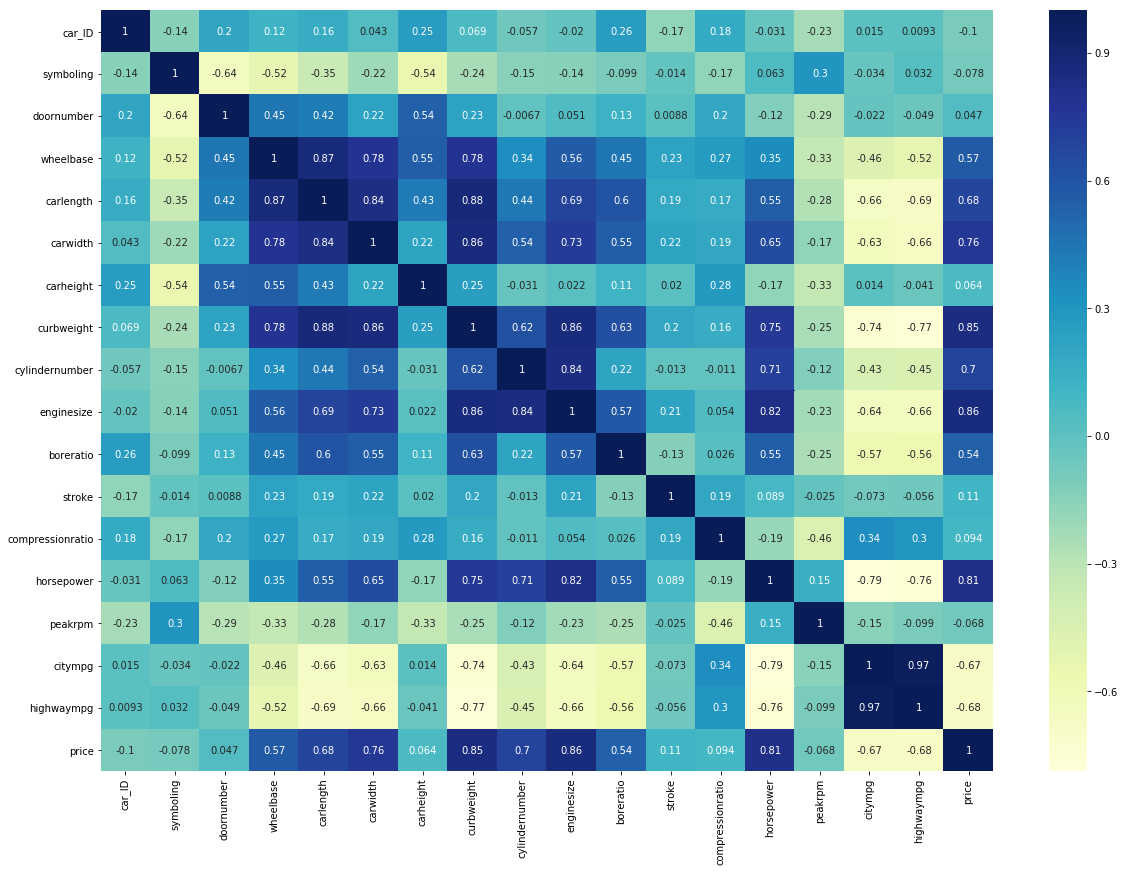

In [5051]:
plt.figure(figsize = (20, 14))
sns.heatmap(df_train[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

## Wheelbase seems to be highly correlated with carlength. So we are plotting a scatterplot.

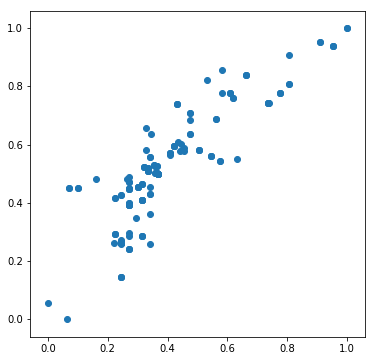

In [5052]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.wheelbase,df_train.carlength)
plt.show()

## Dividing into X and y.

In [5053]:
y_train = df_train.pop('price')
X_train = df_train

## Using RFE selecting the independent variables. We will start with 12 variables.

In [5054]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,12)
rfe = rfe.fit(X_train,y_train)

In [5055]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 11),
 ('symboling', False, 45),
 ('fueltype', False, 30),
 ('aspiration', False, 24),
 ('doornumber', False, 48),
 ('enginelocation', True, 1),
 ('wheelbase', False, 35),
 ('carlength', False, 34),
 ('carwidth', True, 1),
 ('carheight', False, 36),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 26),
 ('horsepower', False, 25),
 ('peakrpm', False, 2),
 ('citympg', False, 33),
 ('highwaympg', False, 23),
 ('hardtop', False, 4),
 ('hatchback', False, 5),
 ('sedan', False, 6),
 ('wagon', False, 3),
 ('fwd', False, 49),
 ('rwd', False, 46),
 ('dohcv', True, 1),
 ('l', False, 29),
 ('ohc', False, 32),
 ('ohcf', False, 31),
 ('ohcv', False, 43),
 ('rotor', False, 21),
 ('2bbl', False, 44),
 ('4bbl', False, 37),
 ('idi', False, 27),
 ('mfi', False, 40),
 ('mpfi', False, 41),
 ('spdi', False, 42),
 ('spfi', False, 50),
 ('alfa-romero', False, 10),
 ('audi', False, 7)

In [5056]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'dohcv', 'bmw', 'buick', 'jaguar',
       'porsche'],
      dtype='object')

In [5057]:
X_train.columns[~rfe.support_]

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'wheelbase', 'carlength', 'carheight', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'alfa-romero', 'audi',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo', 'vw'],
      dtype='object')

## Building the model

In [5058]:
X_train_rfe = X_train[col]

In [5059]:
# Adding a constant
X_train_rfe = sm.add_constant(X_train_rfe)

In [5060]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [5061]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     162.5
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           8.13e-80
Time:                        02:11:03   Log-Likelihood:                 237.69
No. Observations:                 164   AIC:                            -449.4
Df Residuals:                     151   BIC:                            -409.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5248      0.094      5.

## Dropping dohcv since it has a high p-value

In [5062]:
X_train_new = X_train_rfe.drop(['dohcv'], axis=1)

## Rebuilding the model.

In [5063]:
X_train_lm = sm.add_constant(X_train_new)

In [5064]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [5065]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.01e-80
Time:                        02:11:04   Log-Likelihood:                 235.62
No. Observations:                 164   AIC:                            -447.2
Df Residuals:                     152   BIC:                            -410.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4018      0.071      5.

## Calculating the VIF

In [5066]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,233.97
5,enginesize,49.71
4,cylindernumber,20.09
3,curbweight,9.57
6,boreratio,8.17
2,carwidth,4.83
7,stroke,3.63
11,porsche,2.66
1,enginelocation,2.61
10,jaguar,2.20


## Dropping the constant

In [5067]:
X_train_new1 = X_train_lm.drop(['const'], axis=1)

In [5068]:
lm = sm.OLS(y_train,X_train_new1).fit()

In [5069]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     297.3
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.04e-97
Time:                        02:11:04   Log-Likelihood:                 220.08
No. Observations:                 164   AIC:                            -418.2
Df Residuals:                     153   BIC:                            -384.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginelocation    -0.0665      0.058     -1.

## Checking VIF

In [5070]:
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,enginesize,154.48
0,enginelocation,128.75
3,cylindernumber,93.29
5,boreratio,45.65
2,curbweight,45.25
6,stroke,38.46
1,carwidth,33.01
10,porsche,2.34
9,jaguar,2.24
8,buick,1.53


## Dropping enginelocation

In [5071]:
X_train_new2 = X_train_new1.drop(['enginelocation'], axis=1)
#X_train_new2 = X_train_new1.drop(['curbweight'], axis=1)

In [5072]:
lm = sm.OLS(y_train,X_train_new2).fit()

In [5073]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     326.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.13e-98
Time:                        02:11:04   Log-Likelihood:                 219.39
No. Observations:                 164   AIC:                            -418.8
Df Residuals:                     154   BIC:                            -387.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
carwidth           0.2546      0.060      4.

In [5074]:
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,44.55
1,curbweight,42.93
0,carwidth,32.97
2,cylindernumber,18.28
4,boreratio,11.50
5,stroke,7.70
8,jaguar,2.02
7,buick,1.51
9,porsche,1.39
6,bmw,1.26


## Dropping curbweight

In [5075]:
#X_train_new3 = X_train_new2.drop(['stroke'], axis=1)
X_train_new3 = X_train_new2.drop(['curbweight'], axis=1)

In [5076]:
lm = sm.OLS(y_train,X_train_new3).fit()

In [5077]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     314.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           9.77e-95
Time:                        02:11:04   Log-Likelihood:                 207.70
No. Observations:                 164   AIC:                            -397.4
Df Residuals:                     155   BIC:                            -369.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
carwidth           0.4385      0.050      8.

In [5078]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,28.74
0,carwidth,19.90
1,cylindernumber,16.53
3,boreratio,11.19
4,stroke,7.67
7,jaguar,2.01
6,buick,1.51
8,porsche,1.30
5,bmw,1.26


## Dropping carwidth

In [5079]:
#X_train_new4 = X_train_new3.drop(['enginelocation'], axis=1)
X_train_new4 = X_train_new3.drop(['carwidth'], axis=1)

In [5080]:
lm = sm.OLS(y_train,X_train_new4).fit()

In [5081]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     231.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.11e-82
Time:                        02:11:04   Log-Likelihood:                 174.63
No. Observations:                 164   AIC:                            -333.3
Df Residuals:                     156   BIC:                            -308.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cylindernumber    -0.2988      0.102     -2.

In [5082]:
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,27.56
0,cylindernumber,15.80
2,boreratio,8.86
3,stroke,6.43
6,jaguar,1.97
5,buick,1.45
7,porsche,1.28
4,bmw,1.24


## Dropping boreratio

In [5083]:
#X_train_new5 = X_train_new4.drop(['carwidth'], axis=1)
X_train_new5 = X_train_new4.drop(['boreratio'], axis=1)

In [5084]:
lm = sm.OLS(y_train,X_train_new5).fit()

In [5085]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     265.5
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.39e-83
Time:                        02:11:04   Log-Likelihood:                 174.52
No. Observations:                 164   AIC:                            -335.0
Df Residuals:                     157   BIC:                            -313.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cylindernumber    -0.2879      0.099     -2.

In [5086]:
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,18.37
0,cylindernumber,14.96
2,stroke,5.41
5,jaguar,1.66
4,buick,1.36
6,porsche,1.27
3,bmw,1.23


## Dropping jaguar

In [5087]:
#X_train_new6 = X_train_new5.drop(['boreratio'], axis=1)
X_train_new6 = X_train_new5.drop(['jaguar'], axis=1)

In [5088]:
lm = sm.OLS(y_train,X_train_new6).fit()

In [5089]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     309.9
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.14e-84
Time:                        02:11:04   Log-Likelihood:                 174.09
No. Observations:                 164   AIC:                            -336.2
Df Residuals:                     158   BIC:                            -317.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cylindernumber    -0.3046      0.097     -3.

In [5090]:
vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,cylindernumber,14.44
1,enginesize,13.47
2,stroke,4.68
4,buick,1.22
5,porsche,1.17
3,bmw,1.15


## Dropping stroke

In [5091]:
#X_train_new9 = X_train_new6.drop(['cylindernumber'], axis=1)
X_train_new9 = X_train_new6.drop(['stroke'], axis=1)

In [5092]:
lm = sm.OLS(y_train,X_train_new9).fit()

In [5093]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     365.9
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.87e-85
Time:                        02:11:04   Log-Likelihood:                 172.40
No. Observations:                 164   AIC:                            -334.8
Df Residuals:                     159   BIC:                            -319.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cylindernumber    -0.3733      0.090     -4.

In [5094]:
vif = pd.DataFrame()
X = X_train_new9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,13.11
0,cylindernumber,12.23
3,buick,1.18
2,bmw,1.11
4,porsche,1.10


## Dropping cylindernumber

In [5095]:
X_train_new10 = X_train_new9.drop(['cylindernumber'], axis=1)

In [5096]:
lm = sm.OLS(y_train,X_train_new10).fit()

In [5097]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     411.3
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.76e-83
Time:                        02:11:04   Log-Likelihood:                 163.94
No. Observations:                 164   AIC:                            -319.9
Df Residuals:                     160   BIC:                            -307.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
enginesize     0.8354      0.029     28.490      0.0

In [5098]:
vif = pd.DataFrame()
X = X_train_new10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.35
2,buick,1.15
1,bmw,1.11
3,porsche,1.09


## Residual analysis

In [5099]:
#y_train_price = lm.predict(X_train_new8)
y_train_price = lm.predict(X_train_new10)

Text(0.5, 0, 'Errors')

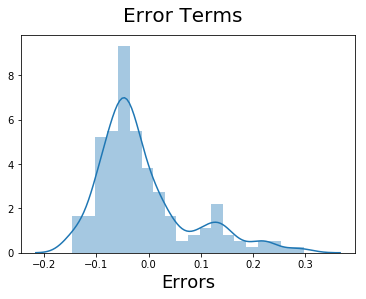

In [5100]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)       

In [5101]:
num_vars = ['car_ID','symboling','doornumber','wheelbase','carlength','carwidth','carheight','curbweight',
           'cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg',
            'price']

In [5102]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [5103]:
df_test.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,vw
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.0,41.000000,41.0,41.000000,41.000000,41.000000,41.0,41.0,41.000000,41.000000,41.0,41.0,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000,41.0
mean,0.578670,0.565854,0.926829,0.780488,0.536585,0.975610,0.477544,0.599207,0.517683,0.536992,0.476215,0.241463,0.297561,0.618467,0.521803,0.170579,0.284959,0.388253,0.286585,0.315096,0.282376,0.097561,0.341463,0.463415,0.073171,0.414634,0.560976,0.0,0.073171,0.731707,0.048780,0.097561,0.0,0.195122,0.0,0.073171,0.0,0.634146,0.048780,0.024390,0.0,0.0,0.048780,0.073171,0.0,0.0,0.048780,0.024390,0.0,0.073171,0.024390,0.048780,0.073171,0.073171,0.048780,0.024390,0.0,0.073171,0.024390,0.195122,0.024390,0.121951,0.0
std,0.268534,0.278935,0.263652,0.419058,0.504854,0.156174,0.237096,0.202206,0.166533,0.190905,0.190466,0.102410,0.180215,0.229504,0.177540,0.216386,0.159654,0.206137,0.156943,0.168417,0.245496,0.300406,0.480091,0.504854,0.263652,0.498779,0.502433,0.0,0.263652,0.448575,0.218085,0.300406,0.0,0.401218,0.0,0.263652,0.0,0.487652,0.218085,0.156174,0.0,0.0,0.218085,0.263652,0.0,0.0,0.218085,0.156174,0.0,0.263652,0.156174,0.218085,0.263652,0.263652,0.218085,0.156174,0.0,0.263652,0.156174,0.401218,0.156174,0.331295,0.0
min,0.053922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.291667,0.158333,0.128394,0.200000,0.109434,-0.111111,-0.060606,0.000000,0.083333,0.000000,0.027778,-0.027027,0.012542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.362745,0.400000,1.000000,1.000000,0.000000,1.000000,0.320690,0.497561,0.408333,0.400000,0.347944,0.200000,0.184906,0.468254,0.469697,0.100000,0.154167,0.265306,0.166667,0.216216,0.105810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.578431,0.600000,1.000000,1.000000,1.000000,1.000000,0.431034,0.570732,0.516667,0.591667,0.483320,0.200000,0.230189,0.682540,0.525253,0.125000,0.266667,0.346939,0.277778,0.297297,0.231539,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.818627,0.800000,1.000000,1.000000,1.000000,1.000000,0.610345,0.741463,0.575000,0.658333,0.603957,0.200000,0.320755,0.746032,0.611111,0.150000,0.404167,0.510204,0.361111,0.405405,0.333757,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,

## Dividing into y_test and X_test

In [5104]:
y_test = df_test.pop('price')
X_test = df_test

In [5105]:
X_test_new = X_test[X_train_new10.columns]

# Adding a constant variable 
#X_test_new = sm.add_constant(X_test_new)

In [5106]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

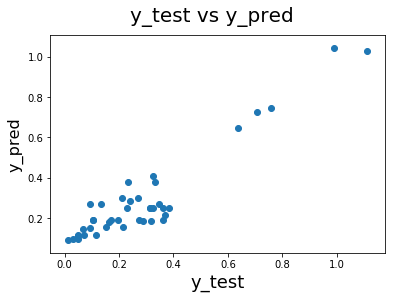

In [5107]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

## Calculating the R2 for the test set.

In [5108]:
r2_score(y_test, y_pred)

0.8791478233238088

In [5109]:
mse = mean_squared_error(y_test, y_pred)
mse

0.007105893870392978

## best fitted line would be price = 1.35 *enginesize + 1.15 * buick + 1.11*bmw + 1.09* porsche